[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a. categorical - type of car
b. quantitative - miles per hour for the car
c. discrete - year car was made
d.continuous - miles on car

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
carbon = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions. 

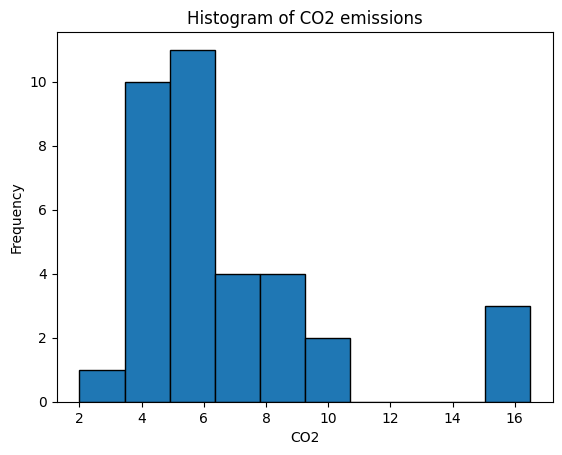

Index(['Nation', 'CO2'], dtype='object')

In [112]:
carbon_west.columns

carbon_west[['Nation', 'CO2']] = carbon_west['Nation           CO2'].str.split(expand=True)
carbon_west['CO2'] = pd.to_numeric(carbon_west['CO2'])
# sorted = carbon_west.sort_values(by='CO2')
# plt.figure(figsize=(10,4))
plt.hist(carbon_west['CO2'], edgecolor='black')
plt.title('Histogram of CO2 emissions')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

carbon.columns


Part b. Find the mean, median, and standard deviation. 

In [39]:
mean = np.mean(carbon_west['CO2'])
median = np.median(carbon_west['CO2'])
std_deviation = np.std(carbon_west['CO2'])

print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'std_deviation: {std_deviation}')

Mean: 6.717142857142858
Median: 5.9
std_deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [41]:
murders = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [59]:

murders[['state', 'murder']] = murders['  state             murder   '].str.split(expand=True)
murders['murder'] = pd.to_numeric(murders['murder'])
woDC = murders[murders['state'] != 'DC']
woDC_mean = np.mean(woDC['murder'])
woDC_median = np.median(woDC['murder'])
woDC_std_dev = np.std(woDC['murder'])


print(f'Mean for murders w/0 D.C. : {woDC_mean}')
print(f'Median for murders w/0 D.C. : {woDC_median}')
print(f'std_deviation for murders w/0 D.C. : {woDC_std_dev}')



Mean for murders w/0 D.C. : 4.874
Median for murders w/0 D.C. : 4.85
std_deviation for murders w/0 D.C. : 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [60]:
woDC_minimum = np.min(woDC["murder"])
woDC_q1 = np.percentile(woDC["murder"], 25)
woDC_median = np.median(woDC["murder"])
woDC_q3 = np.percentile(woDC["murder"], 75)
woDC_maximum = np.max(woDC["murder"])

print(f"Minimum: {woDC_minimum}")
print(f"1st Quartile (Q1): {woDC_q1}")
print(f"Median (Q2): {woDC_median}")
print(f"3rd Quartile (Q3): {woDC_q3}")
print(f"Maximum: {woDC_maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [62]:
murders['murder'].describe()

count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64

The mean is more affected by this outlier because the mean is the average whereas the median is the middle value.
The range is more affected by the outlier because the outlier creates a max for the data and doubles the range where as the inter-quartile range doesn't change much and represents the middle of the data.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [63]:
houses = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home. 

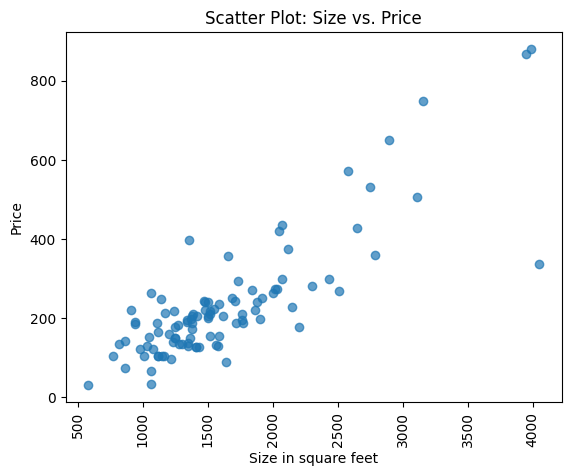

In [91]:
houses.columns
houses[['case', 'price', 'size', 'new', 'taxes', 'bedrooms', 'baths']] = houses['case        price    size    new    taxes    bedrooms    baths'].str.split(expand=True)
# houses_sorted = houses.sort_values(by='size')
houses['price'] = pd.to_numeric(houses['price'])
houses['size'] = pd.to_numeric(houses['size'])
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Size vs. Price')
plt.xlabel('Size in square feet')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


Part b. Find the correlation between the two variables.

In [85]:
house_correlation = houses['size'].corr(houses['price'])

print(f'Correlation between Size and Price of houses: {house_correlation}')

Correlation between Size and Price of houses: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot. 

slope (coefficient): 0.18989116794379637
Intercept: -76.3893821074686


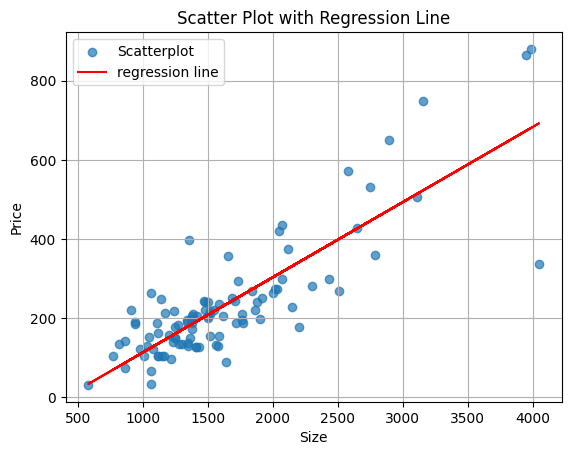

In [94]:
x = houses[['size']]
y = houses['price']
model = LinearRegression()
model.fit(x,y)
slope = model.coef_[0]
intercept = model.intercept_

print(f'slope (coefficient): {slope}')
print(f'Intercept: {intercept}')

plt.scatter(x,y, alpha=0.7, label='Scatterplot')
plt.plot(x, model.predict(x), color='red', label='regression line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()





Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

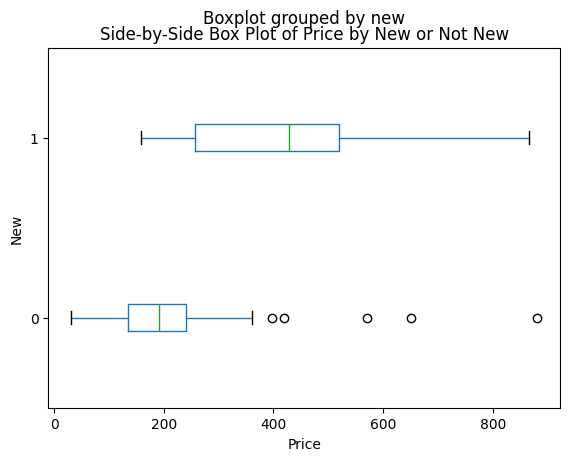

In [99]:
houses.boxplot(column='price', by='new', vert=False, grid=False)
plt.title('Side-by-Side Box Plot of Price by New or Not New')
plt.xlabel('Price')
plt.ylabel('New')

plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong positive correlation between house size and house price of .8338. This means that as the size of the house increases, generally the price will also increase. As you can see on the scatter plot with the regression line, it is a positive slope.

From the boxplots, it appears that if the house is new, it is more likey to be priced higher. This can be seen because the median for new houses is slightly above 400 while the median for old houses is around 200. The plot for new houses also has a larger IQR than the one for old houses which shows more variablity but it's more likely for the price to be higher for new because Q1 of the new houses is higher than Q3 for the old houses.



**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [100]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [109]:
happy.columns
happy[['subject', 'happiness', 'marital', 'gender']] = happy['subject happiness marital gender'].str.split(expand=True)

pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
